In [35]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from keras import Model

In [19]:
help(keras.datasets.mnist.load_data)

Help on function load_data in module keras.datasets.mnist:

load_data(path='mnist.npz')
    Loads the MNIST dataset.
    
    This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
    along with a test set of 10,000 images.
    More info can be found at the
    [MNIST homepage](http://yann.lecun.com/exdb/mnist/).
    
    Args:
      path: path where to cache the dataset locally
        (relative to `~/.keras/datasets`).
    
    Returns:
      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **x_train**: uint8 NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **y_train**: uint8 NumPy array of digit labels (integers in range 0-9)
      with shape `(60000,)` for the training data.
    
    **x_test**: uint8 NumPy array of grayscale image data with shapes
      (10000, 28, 28), containing the test data. Pixel values range
      from 0 to 255.
    
  

In [20]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="C:/Users/anujp/.keras/datasets/mnist.npz")

In [21]:
x_train.shape

(60000, 28, 28)

In [22]:
x_test.shape

(10000, 28, 28)

In [23]:
x_train=x_train.reshape((x_train.shape[0],28*28*1))

In [24]:
x_test=x_test.reshape((x_test.shape[0],28*28*1))

In [25]:
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

In [26]:
from sklearn.preprocessing import LabelBinarizer

In [27]:
lb=LabelBinarizer()

In [28]:
y_train=lb.fit_transform(y_train)
y_test=lb.transform(y_test)

In [31]:
model=Sequential(
[
    Dense(128,input_shape=(784,),activation='sigmoid'),
    Dense(64,activation='sigmoid'),
    Dense(10,activation='softmax')
]
)

In [33]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics='accuracy')

In [34]:
H=model.fit(x_train,y_train,epochs=20,batch_size=128,validation_data=(x_train,y_train))

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 2.2799 - accuracy: 0.2038 - val_loss: 2.2474 - val_accuracy: 0.2299
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 2.2185 - accuracy: 0.3494 - val_loss: 2.1862 - val_accuracy: 0.4326
Epoch 3/20
469/469 [==============================] - 3s 5ms/step - loss: 2.1474 - accuracy: 0.4474 - val_loss: 2.1032 - val_accuracy: 0.5229
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 2.0489 - accuracy: 0.5121 - val_loss: 1.9879 - val_accuracy: 0.5412
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 1.9164 - accuracy: 0.5547 - val_loss: 1.8392 - val_accuracy: 0.5775
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 1.7560 - accuracy: 0.5960 - val_loss: 1.6697 - val_accuracy: 0.6122
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 1.5832 - accuracy: 0.6298 - val_loss: 1.4968 - val_accuracy: 0.6664
Epoch 

In [37]:
predictions=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [38]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(x_test.argmax(axis=1),predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          38       0.00      0.00      0.00       1.0
          40       0.00      0.00      0.00       1.0
          41       0.00      0.00      0.00       1.0
          42       0.00      0.00      0.00       2.0
          43       0.00      0.00      0.00       1.0
          46       0.00      0.00      0.00       1.0
          62       0.00      0.00      0.00       1.0
          64       0.00    

C:\Users\anujp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anujp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anujp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anujp\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [43]:
H.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [44]:
import numpy as np

Text(0, 0.5, 'Loss/Accuracy')

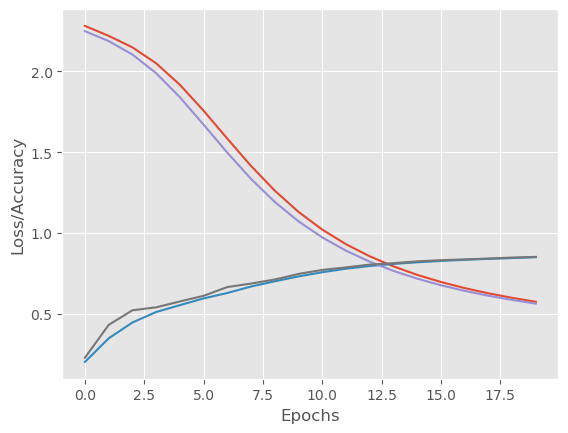

In [47]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0,20),H.history['loss'])
plt.plot(np.arange(0,20),H.history['accuracy'])
plt.plot(np.arange(0,20),H.history['val_loss'])
plt.plot(np.arange(0,20),H.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")